In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df_long = pd.read_csv('../data/full.csv')
low_states = ['MD', 'NM', 'NV', 'OK', 'SC']
df = df_long[~df_long.state.isin(low_states)]

Cutting finding lowest year.

In [7]:
df.groupby('year').sum().sort_values('numcol')['numcol']

year
2008    2310000.0
2006    2362000.0
2005    2375000.0
2007    2412000.0
2011    2459000.0
2009    2465000.0
2012    2504000.0
2001    2508000.0
2004    2517000.0
2002    2534000.0
2000    2566000.0
2003    2570000.0
1998    2586000.0
1999    2601000.0
2013    2607000.0
2015    2616000.0
2017    2619000.0
2010    2659000.0
2014    2700000.0
2016    2724000.0
2018    2751000.0
2019    2766000.0
Name: numcol, dtype: float64

In [8]:
df.groupby('year').mean().sort_values('numcol')['numcol']

year
2008    59230.769231
2006    60564.102564
2005    60897.435897
2007    61846.153846
2011    63051.282051
2009    63205.128205
2012    64205.128205
2001    64307.692308
2004    64538.461538
2002    64974.358974
2000    65794.871795
2003    65897.435897
1998    66307.692308
1999    66692.307692
2013    66846.153846
2015    67076.923077
2017    67153.846154
2010    68179.487179
2014    69230.769231
2016    69846.153846
2018    70538.461538
2019    70923.076923
Name: numcol, dtype: float64

In [12]:
lowest = df[df['year'] == 2008]['numcol'].to_numpy()
lowest

array([  9000.,  25000.,  28000., 360000.,  27000., 150000.,  65000.,
        10000.,  90000.,   8000.,   7000.,  24000.,  10000.,   4000.,
        40000.,   7000.,  71000., 122000.,  14000.,  11000., 134000.,
        36000.,   9000.,  50000.,  12000., 400000.,  14000.,  50000.,
        23000., 225000.,   7000.,  77000.,  28000.,   5000.,   6000.,
        49000.,   6000.,  58000.,  39000.])

In [19]:
def bootstrap_mean(data, samples=10**4):
    bootstrap = []
    for i in range(samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap.append(np.mean(sample))
    return bootstrap

In [44]:
means = bootstrap_mean(data=lowest)
mean = np.mean(means)
std = np.std(means)
print(mean, std)

59331.59230769231 14047.29308178046


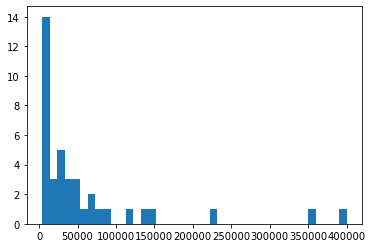

In [35]:
fig, ax = plt.subplots()
ax.hist(np.sort(lowest), bins=40);

In [46]:
no_out = lowest[lowest < 300000]
print(no_out)
low_means = bootstrap_mean(data=no_out)
low_mean = np.mean(means)
low_std = np.std(means)
print(low_mean, low_std)

[  4000.   5000.   6000.   6000.   7000.   7000.   7000.   8000.   9000.
   9000.  10000.  10000.  11000.  12000.  14000.  14000.  23000.  24000.
  25000.  27000.  28000.  28000.  36000.  39000.  40000.  49000.  50000.
  50000.  58000.  65000.  71000.  77000.  90000. 122000. 134000. 150000.
 225000.]
59331.59230769231 14047.29308178046


Looks like I forgot that if you're bootstrapping 10k samples your two outlier datapoints are going to be minimized in their effects! So nothing to worry about or justify there. Besides you know, the fact that I thought this in the first place and was flirting with data manipulation.

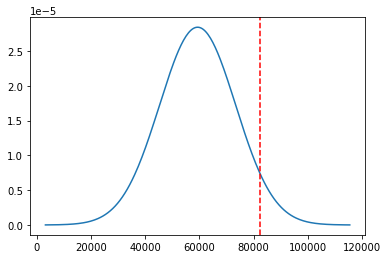

In [66]:
low_dist = stats.norm(loc=mean, scale = std)
alpha = low_dist.ppf(.95)
fig, ax = plt.subplots()
x_range = np.linspace(mean-std*4, mean+std*4, 250)
ax.plot(x_range, low_dist.pdf(x_range))
ax.axvline(alpha, linestyle='--', color='r');

In [79]:
recent = df[df['year'] == 2019]['numcol'].to_numpy()
recent

array([  7000.,  23000.,  20000., 335000.,  32000., 205000., 102000.,
        16000.,  92000.,  11000.,   9000.,  38000.,   7000.,   6000.,
        54000.,  15000.,  94000., 118000.,  22000.,  10000., 173000.,
        39000.,  15000.,  59000.,  14000., 520000.,  15000.,  87000.,
        19000., 270000.,   8000., 126000.,  22000.,   6000.,   5000.,
        81000.,   6000.,  46000.,  39000.])

In [80]:
recent_means = bootstrap_mean(data=recent)
recent_mean = np.mean(recent_means)
recent_std = np.std(recent_means)
print(recent_mean, recent_std)

70965.63846153846 16394.090659992118


In [82]:
p = 1 - low_dist.cdf(recent_mean)
p

0.2037770493968516